In [2]:
%pip install tensorflow medmnist matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Step 2: Import necessary libraries
from medmnist.dataset import PathMNIST
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

# Step 2: Load the dataset
train_dataset = PathMNIST(split='train', download=True)
test_dataset = PathMNIST(split='test', download=True)

# Step 2: Prepare images and labels
X_train = train_dataset.imgs
y_train = train_dataset.labels.flatten()
X_test = test_dataset.imgs
y_test = test_dataset.labels.flatten()

# Step 2: Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Step 2: Check the data shapes
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (89996, 28, 28, 3)
Test data shape: (7180, 28, 28, 3)


In [6]:
# Step 4: Build the corrected CNN model

model = models.Sequential([
    layers.Input(shape=(28, 28, 3)),       # Define input shape first
    layers.Resizing(128, 128),              # Then resize
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')  # 9 classes
])

# Step 4: Show model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)      

In [8]:
# Step 5 (updated): Use a smaller subset of data

# Select only the first 15000 samples for faster and lighter training
X_train_small = X_train[:15000]
y_train_small = y_train[:15000]

# Now split
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_small, y_train_small, test_size=0.2, random_state=42
)

# Then train
history = model.fit(
    X_train_final, y_train_final,
    epochs=10,
    validation_data=(X_val, y_val)
)


Epoch 1/10
375/375 [==============================] - 118s 311ms/step - loss: 1.5702 - accuracy: 0.4032 - val_loss: 1.2828 - val_accuracy: 0.5207
Epoch 2/10
375/375 [==============================] - 111s 295ms/step - loss: 1.1225 - accuracy: 0.5814 - val_loss: 0.9604 - val_accuracy: 0.6347
Epoch 3/10
375/375 [==============================] - 119s 319ms/step - loss: 0.9271 - accuracy: 0.6562 - val_loss: 1.1043 - val_accuracy: 0.5713
Epoch 4/10
375/375 [==============================] - 113s 301ms/step - loss: 0.8001 - accuracy: 0.7032 - val_loss: 0.8923 - val_accuracy: 0.6633
Epoch 5/10
375/375 [==============================] - 115s 307ms/step - loss: 0.7400 - accuracy: 0.7249 - val_loss: 0.8621 - val_accuracy: 0.6843
Epoch 6/10
375/375 [==============================] - 114s 304ms/step - loss: 0.6247 - accuracy: 0.7689 - val_loss: 0.8752 - val_accuracy: 0.6707
Epoch 7/10
375/375 [==============================] - 115s 306ms/step - loss: 0.5889 - accuracy: 0.7815 - val_loss: 0.7601 -

In [10]:
# Step 6: Evaluate the model on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"\nTest Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


225/225 - 11s - loss: 1.0929 - accuracy: 0.6645 - 11s/epoch - 49ms/step

Test Loss: 1.0928902626037598
Test Accuracy: 0.6644846796989441


In [11]:
# Save the trained model
model.save('pathmnist_cnn_model.h5')


1/1 [==============================] - 0s 190ms/step


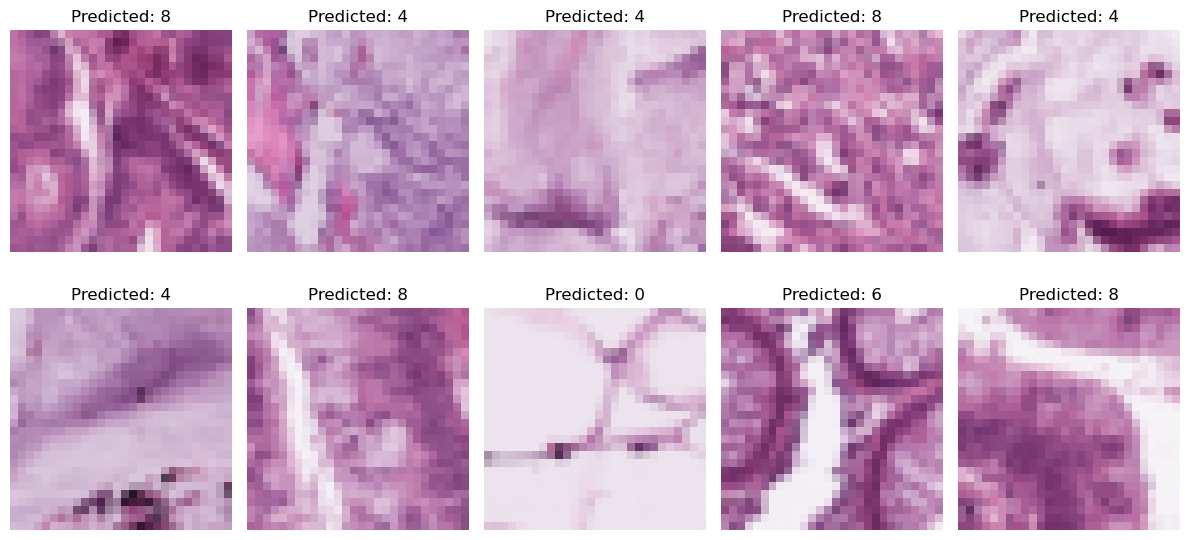

In [12]:
import matplotlib.pyplot as plt

# Predict first 10 images from test set
predictions = model.predict(X_test[:10])
predicted_labels = np.argmax(predictions, axis=1)

# Plot the first 10 test images and their predictions
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
